In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

import openweathermapy.core as owm
import seaborn as sns
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
#Lists with values from the for loop
temperature =[]
humidity=[]
cloudy=[]
windspeed=[]
latitude = []
cities_name=[]
#starting the for loop for list values
for city in cities:
    try:
        # building the query 
        query_url = url+ '&q=' + city 
        cityweather = requests.get(query_url).json()
        
        temp = cityweather['main']['temp']
        hum = cityweather['main']['humidity']
        cloud = cityweather['clouds']['all']
        wind=cityweather['wind']['speed']
        lat_data=cityweather['coord']['lat'] 
        city_name = cityweather['name']
        
        temperature.append(temp)
        humidity.append(hum)
        cloudy.append(cloud)
        windspeed.append(wind)
        latitude.append(lat_data)
        cities_name.append(city_name)
    except:
        pass
# Used a try and except incase of any data that was unreadable to continue the program

In [5]:
#building the data frame with pandas to be able to call data from
weather_df = pd.DataFrame({'temperature':temperature,
                           'humidity':humidity,
                           'cloudy':cloudy,
                           'windspeed':windspeed,
                           'latitude':latitude,
                           'cities':cities_name})
weather_df.head()
weather_df.to_csv('weather_df.csv')

In [6]:
#This n determines how many cities we generate
# We also initialize our lists to track the cities

n = 600
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure that the randomly generated city is not already in our series
    # If it is, regenerate the lat and lng until we get one that isn't
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

In [7]:
# Create base URL and indicate imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [8]:
# Build partial query URL
query = f"{url}appid={api_key}&units={units}&q="

In [9]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # Sometimes it's not cloudy! Then 'clouds' does not exist, so set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=bluff,NZ
Processing record 2 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=aklavik,CA
Processing record 3 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=vaini,TO
Processing record 4 | sao gabriel da cachoeira
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=sao gabriel da cachoeira,BR
Processing record 5 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=tilichiki,RU
Processing record 6 | cafelandia
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=cafelandia,BR
Processing record 7 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427

Processing record 57 | davidson
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=davidson,CA
Processing record 58 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=lebu,CL
Processing record 59 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=yellowknife,CA
Processing record 60 | kainantu
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=kainantu,PG
Processing record 61 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=clyde river,CA
Processing record 62 | padang
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=padang,ID
Processing record 63 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01f

Processing record 114 | harper
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=harper,LR
Processing record 115 | graaff-reinet
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=graaff-reinet,ZA
Processing record 116 | poum
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=poum,NC
Processing record 117 | aranos
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=aranos,NA
Processing record 118 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=te anau,NZ
Processing record 119 | macae
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=macae,BR
Processing record 120 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&unit

Processing record 170 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=saldanha,ZA
Processing record 171 | mocambique
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=mocambique,MZ
Processing record 172 | breves
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=breves,BR
Processing record 173 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=bambous virieux,MU
Processing record 174 | labuhan
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=labuhan,ID
Processing record 175 | port keats
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=port keats,AU
Processing record 176 | east london
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8

Processing record 225 | yuancheng
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=yuancheng,CN
Processing record 226 | tirumullaivasal
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=tirumullaivasal,IN
Processing record 227 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=rio gallegos,AR
Processing record 228 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=geraldton,CA
Processing record 229 | wagar
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=wagar,SD
Processing record 230 | praia
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=praia,CV
Processing record 231 | tiarei
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886

Processing record 280 | stornoway
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=stornoway,GB
Processing record 281 | kutahya
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=kutahya,TR
Processing record 282 | gumdag
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=gumdag,TM
Processing record 283 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=shenjiamen,CN
Processing record 284 | sokoni
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=sokoni,TZ
Processing record 285 | altay
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=altay,CN
Processing record 286 | turayf
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units

Processing record 336 | moree
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=moree,AU
Processing record 337 | port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=port-gentil,GA
Processing record 338 | walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=walvis bay,NA
Processing record 339 | campo maior
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=campo maior,BR
Processing record 340 | chudniv
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=chudniv,UA
Processing record 341 | birin
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=birin,DZ
Processing record 342 | puerto leguizamo
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4

Processing record 392 | lubao
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=lubao,CD
Processing record 393 | yuzhnyy
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=yuzhnyy,RU
Processing record 394 | saleaula
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=saleaula,WS
Processing record 395 | evensk
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=evensk,RU
Processing record 396 | okato
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=okato,NZ
Processing record 397 | matagami
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=matagami,CA
Processing record 398 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imp

Processing record 448 | brae
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=brae,GB
Processing record 449 | ramshir
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=ramshir,IR
Processing record 450 | sorkjosen
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=sorkjosen,NO
Processing record 451 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=paamiut,GL
Processing record 452 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=thompson,CA
Processing record 453 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=vaitupu,WF
Processing record 454 | salekhard
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&unit

Processing record 503 | uruzgan
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=uruzgan,AF
Processing record 504 | katherine
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=katherine,AU
Processing record 505 | imbituba
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=imbituba,BR
Processing record 506 | vila
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=vila,VU
Processing record 507 | nuuk
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=nuuk,GL
Processing record 508 | temryuk
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=temryuk,RU
Processing record 509 | imeni poliny osipenko
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa

Processing record 558 | magadan
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=magadan,RU
Processing record 559 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=karratha,AU
Processing record 560 | pitkyaranta
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=pitkyaranta,RU
Processing record 561 | porbandar
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=porbandar,IN
Processing record 562 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=petropavlovsk-kamchatskiy,RU
Processing record 563 | hanumangarh
http://api.openweathermap.org/data/2.5/weather?appid=3da4fd8a427886b4db5694d771c01fa0&units=imperial&q=hanumangarh,IN
Processing record 564 | shumskiy
http://api.openweathermap.org/dat

In [10]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country
0,bluff,-46.60,168.33,96.0,57.44,92,5.53,1.543870e+09,NZ
1,aklavik,68.22,-135.01,78.0,17.60,40,9.17,1.543867e+09,CA
2,vaini,-21.20,-175.20,74.0,82.40,20,11.68,1.543867e+09,TO
3,sao gabriel da cachoeira,-0.13,-67.09,94.0,75.20,75,2.24,1.543867e+09,BR
4,tilichiki,60.47,166.10,60.0,-6.92,76,3.85,1.543870e+09,RU


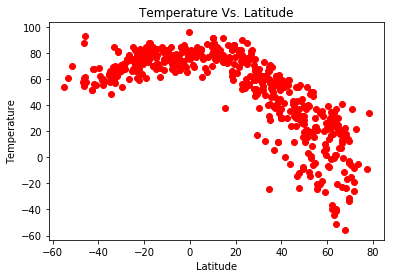

In [12]:
#building plot for temp vs lat
x_axis = weather_df['Latitude']
y_axis = weather_df['Max Temp']
#min and max for x and y axis 
x_min =x_axis.min() -10
y_max =y_axis.max() +10
#titles for graph 
plt.title("Temperature Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Temperature')
#building and printng the graph 
plt.scatter(x_axis,y_axis,marker='o',color='red')

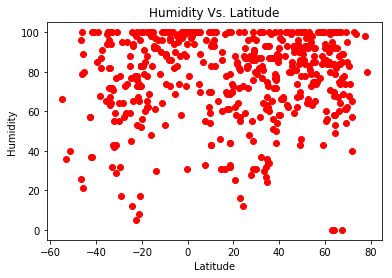

In [14]:
#building plot for humidity vs lat
x_axis = weather_df['Latitude']
y_axis = weather_df['Humidity']

x_min =x_axis.min() -10
y_max =y_axis.max() +10

plt.title("Humidity Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Humidity')

plt.scatter(x_axis,y_axis,marker='o',color='red')

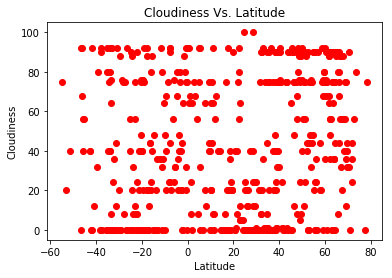

In [16]:
#building plot for cloudy vs lat
x_axis = weather_df['Latitude']
y_axis = weather_df['Cloudiness']

x_min =x_axis.min() -10
y_max =y_axis.max() +10

plt.title("Cloudiness Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')

plt.scatter(x_axis,y_axis,marker='o',color='red')

In our first graph, we can see evidence of a hyperbolic trend, peaking from Latitudes -15 degrees to 15 degrees. At this peak range, temperature was approximately 79 degrees.

Secondly, we observe two possible pockets of trends in humidity vs latitude scatterplot. From -40 degrees to -15 degrees and 15 degrees to 40 degrees there are two clusters of data points that exhibit high concentrations of humidity. It seems surprising the frequency of observations with 100% humidity.

Finally we observe chaos in the final graph charting Latitude versus Cloudiness. In the same Latitude we find ranges from 0 to 100 percent cloudiness suggesting not even a trend within one Latitude, nevermind across Latitudes.